In [4]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

train=pd.read_csv("CAX_LogFacies_Train_File.csv" )
#test=pd.read_csv("CAX_LogFacies_Test_File.csv")

In [5]:
train["nextlabel"] = train["label"].shift(-1)
train["nextwell"] = train["well_id"].shift(-1)

def list_labels(nlabel):
    labels = []
    interval = []
    for i,p in train.iterrows():
        if p["label"] == nlabel:
            interval.append(p)
            if p["nextlabel"] != nlabel or p["nextwell"] != p["well_id"]:
                labels.append(interval)
                interval=[]
    return labels

labelzero = list_labels(0)
labelone = list_labels(1)
labeltwo = list_labels(2)
labelthree = list_labels(3)
labelfour = list_labels(4)
interlabel = [labelzero,labelone,labeltwo,labelthree,labelfour]
intervallen = []
for i in (interlabel):
    intervallen.append([len(x) for x in i])


In [6]:
palet= ["blue","orange","green","red","purple"]
names  = ["Serrated","Symmetrical", "Cylindrical" ,  "Funnel" ,    "Bell"]
for n,i in enumerate(names):
    train.loc[train["label"] ==n,"name"] = i

In [7]:
filterlen = [[z for z in x if len(z)>30] for x in interlabel]


In [8]:
palet= ["blue","orange","green","red","purple"]
norminterlabel =[]
auxlist = []
for c ,u in enumerate(filterlen):
    for n, elem in enumerate(u):
        pd.DataFrame(elem).reset_index(inplace =True,drop =True)
        frag = pd.DataFrame(elem)
        frag.index = (frag.index - min(frag.index))/(max(frag.index) - min(frag.index))
        auxlist.append(frag)
    
    norminterlabel.append(auxlist)
    auxlist = []

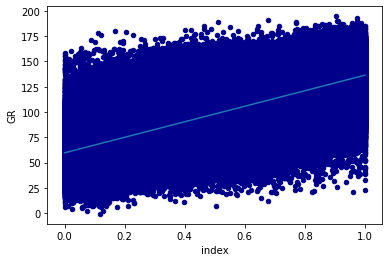

In [9]:
a = pd.concat(norminterlabel[3]).reset_index().copy()

ax1 = a.plot.scatter(y='GR', x='index',    c='DarkBlue')
x = a["index"]
y = a["GR"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z) 
plt.plot(x,p(x))

In [ ]:
for n,i in enumerate(norminterlabel):
    a = pd.concat(i).reset_index()
    x =  a.index
    y =  a.GR
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
#     plt.scatter(x, y)

    a.plot.scatter(x = "index" , y = "GR" ,c =palet[n])
    plt.plot(x,p(x),"r--")

In [ ]:
palet= ["blue","orange","green","red","purple"]
for c,u in enumerate(filterlen):
    for n, elem in enumerate(u):
        pd.DataFrame(elem).reset_index(inplace =True,drop =True)
        frag = pd.DataFrame(elem).reset_index(drop =True)
        frag.index = (frag.index - min(frag.index))/(max(frag.index) - min(frag.index))
        frag["GR"].plot(color =palet[c])
#         sns.lineplot(x=frag.index ,y="GR", data=frag,)
    plt.show()

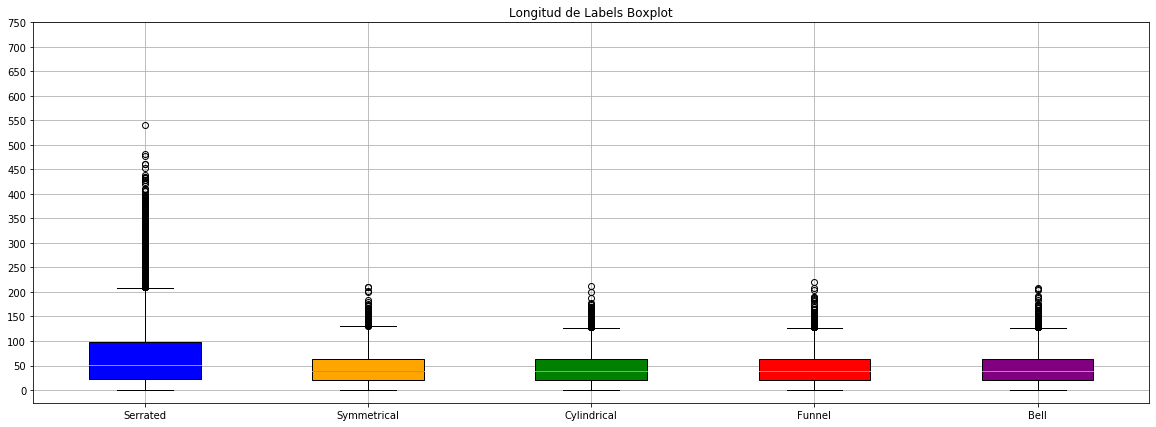

In [225]:
fig,axes = plt.subplots(1,1,figsize=(20,7))
box=axes.boxplot(intervallen,
             labels=names,     
             patch_artist=True
            )
axes.grid()
axes.set_yticks(np.arange(0,800,50)) 
axes.set_title("Longitud de Labels Boxplot") 
palet= ["blue","orange","green","red","purple"]

for n, box in enumerate(box['boxes']):
    box.set(facecolor = palet[n])


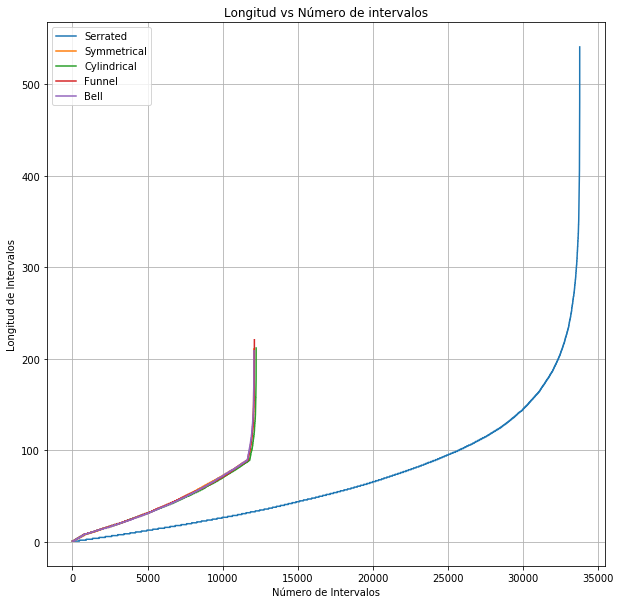

In [213]:
for i in intervallen:
    i.sort()

fig,axes = plt.subplots(1,1,figsize=(10,10))
for n,i in enumerate(intervallen):
    axes.plot(i, label=names[n])
    axes.legend()
    axes.grid()
    axes.set_xlabel("Número de Intervalos")
    axes.set_ylabel("Longitud de Intervalos")
    axes.set_title("Longitud vs Número de intervalos")


In [ ]:
len(list(filter(lambda x: x> 1.5*(x -st.mean(intervallen[1] )/st.stdev(intervallen[1]))  , intervallen[1])))

In [8]:
import statistics as st


medias =[]
std = []
cantidad = []
Maximo_Intervalo = []
Minimo_Intervalo = []
Mediana = []
for i in range(5):
    medias.append(st.mean(intervallen[i]))
    std.append(st.stdev(intervallen[i]))
    cantidad.append(len(intervallen[i]))
    Maximo_Intervalo.append(max(intervallen[i]))
    Minimo_Intervalo.append(min(intervallen[i]))
    Mediana.append(st.median(intervallen[i]))

analisis = {"Media": medias, "Desvio": std, "Mediana":Mediana , "Maximo":Maximo_Intervalo, "Minimo":Minimo_Intervalo, "Cantidad":cantidad }   
dfanalisis = pd.DataFrame(analisis, index=names)
dfanalisis["Proporción"] = dfanalisis["Cantidad"]/dfanalisis["Cantidad"].sum()

print(round(dfanalisis,4).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &    Media &   Desvio &  Mediana &  Maximo &  Minimo &  Cantidad &  Proporción \\
\midrule
Serrated    &  66.6471 &  56.6793 &     58.0 &     245 &       3 &        85 &      0.4293 \\
Symmetrical &  44.8485 &  23.7594 &     49.0 &      87 &       2 &        33 &      0.1667 \\
Cylindrical &  40.7586 &  24.5323 &     44.0 &      88 &       2 &        29 &      0.1465 \\
Funnel      &  49.0741 &  24.9012 &     51.0 &      98 &       2 &        27 &      0.1364 \\
Bell        &  56.1667 &  27.6903 &     53.5 &     140 &       7 &        24 &      0.1212 \\
\bottomrule
\end{tabular}



,Media,Desvio,Mediana,Maximo,Minimo,Cantidad,Proporción
Serrated,77.5379,74.3910,54.0,691,0,29828,0.3807
Symmetrical,43.0838,28.0467,39.0,211,0,12084,0.1542
Cylindrical,42.9393,27.7454,39.0,212,0,12233,0.1561
Funnel,43.0858,27.8745,39.0,221,0,12116,0.1546
Bell,42.8872,28.1910,38.0,209,0,12086,0.1543


In [359]:
a = [[z for z in x if 30<len(z)] for x in interlabel]

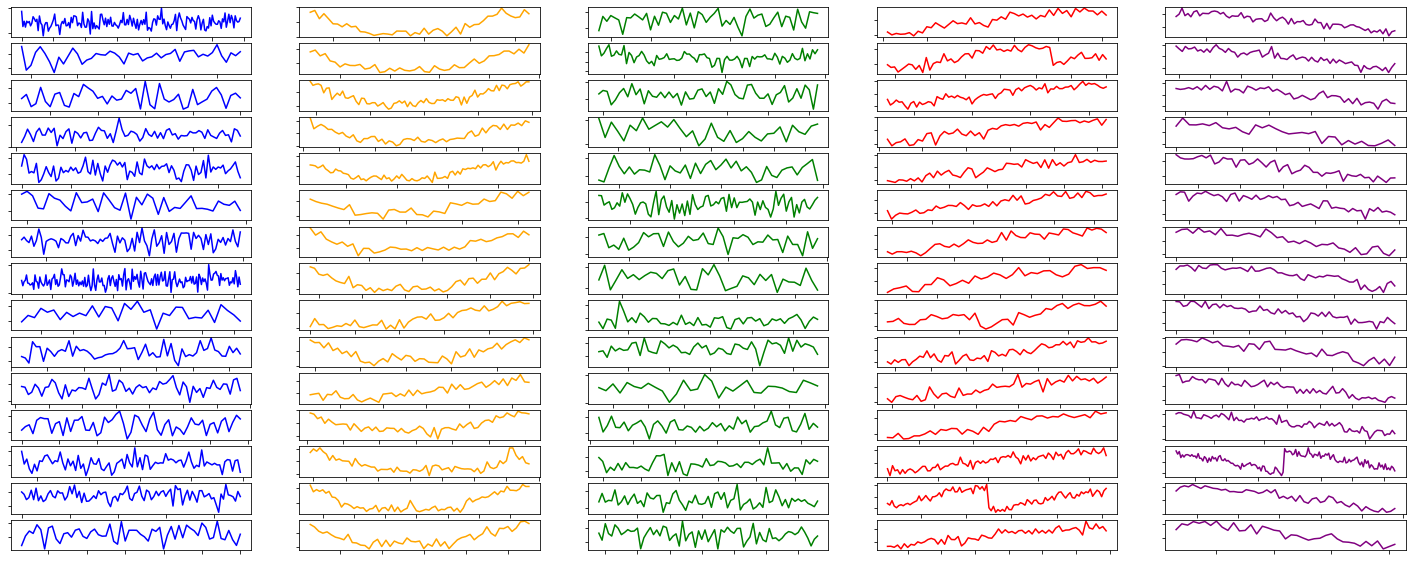

In [360]:
x=15
labels = 5
fig,axes = plt.subplots(x,labels,figsize=(25,10))
for i in range(x):
    for u in range(labels):
        axes[i][u].plot(pd.DataFrame(a[u][i])["GR"],color= palet[u])
        axes[i][u].set_yticklabels([])
        axes[i][u].set_xticklabels([])


## Gráfico ejemplo de lo que se encuentra en un pozo del dataset. Se ve que la clase 0 (azul) es la clase mayoritaria que presenta menor tendencia que las otras
## En negro sobre el eje derecho se ve el numero de label de cada clase

Text(0.5, 1.0, 'well_id 239')

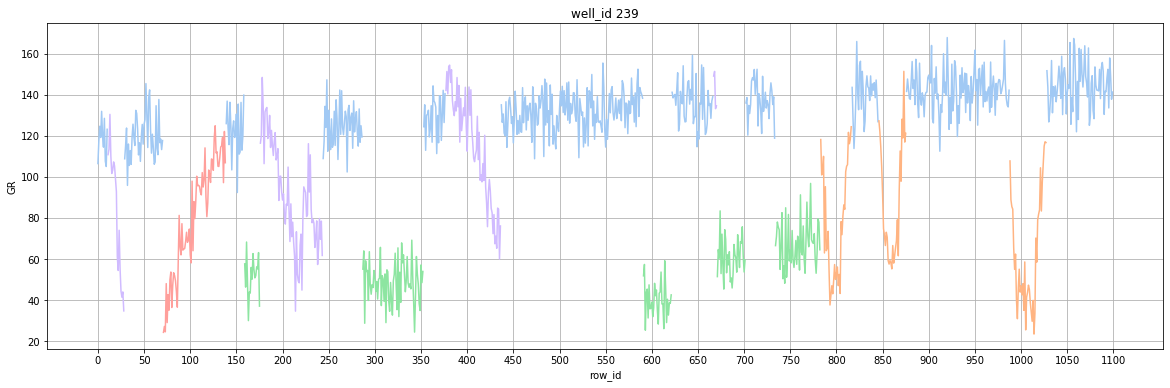

In [16]:
def plot_multicolored_line(df, i):
    df = train.query("well_id  in '{}'".format(i)).reset_index()
    labels= df["label"].unique()
    palette1 = sns.color_palette('dark', 5)
    palette2 = sns.color_palette('pastel', 5)
    plt.figure(figsize=(20, 6))
    for l in list(labels):
        copy = df.copy()
        copy.loc[copy['label']!= l,[ "GR", ]] = np.nan
        plt.plot(copy["GR"], color=palette2[l])

       # plt.plot(copy["rolling_mean2"], color="k") 
plot_multicolored_line(train ,239)
plt.xticks(np.arange(0,1101,50))
plt.grid()
plt.xlabel("row_id")
plt.ylabel("GR")
plt.title("well_id 239")


## Distribucion total de las clases

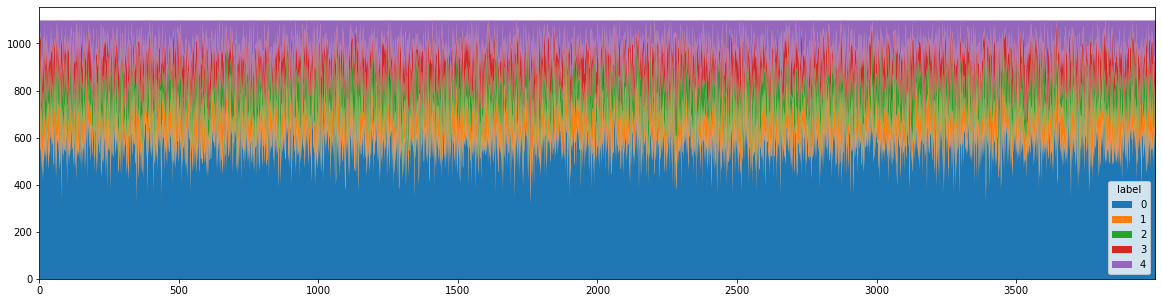

In [2]:
pivoted = pd.pivot_table(data = train,columns  = "label",aggfunc='count' ,index = 'well_id',values = "GR")

pd.pivot_table(data = train,columns  = "label",aggfunc='count' ,index = 'well_id',values = "GR").reset_index(drop =True).plot(kind = 'area',figsize=(20,5),linewidth = 0.01,)

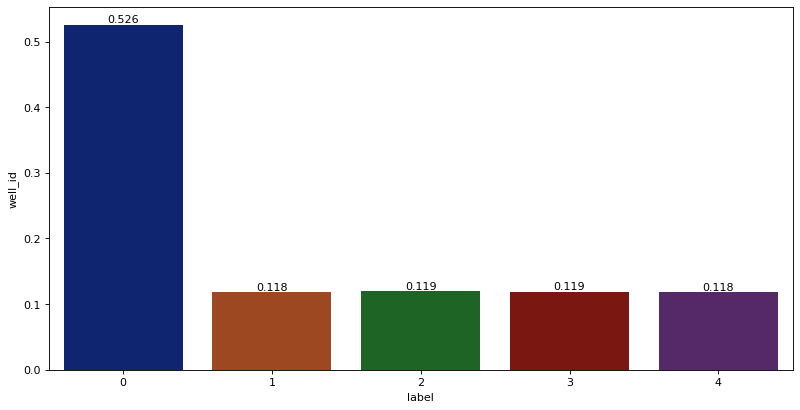

<Figure size 1080x720 with 0 Axes>

In [3]:
# sns.set_style("whitegrid")

from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

data = (train.groupby(['label']).count()/train.count())[["well_id"]]
data.sort_values("well_id", ascending = False, inplace= True)
graph = sns.barplot(x=data.index,y='well_id', data=data, palette='dark',label="name")

plt.figure(figsize=(15,10))
for p in graph.patches:
        graph.annotate(f'{p.get_height().round(3)}', (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        

## Distribucion cada clase a lo largo de la profundidad del pozo
## Vemos que en los extremos hay principalmente labels 0

Text(0.5, 1.0, 'Probabiliddad de Label vs row_id')

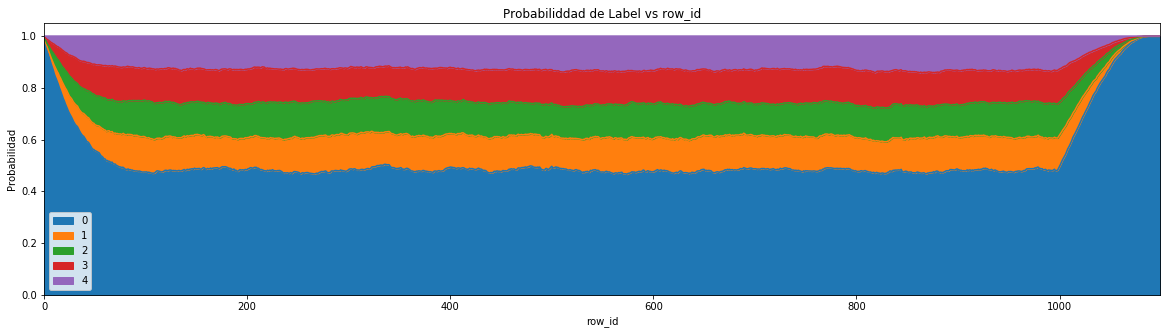

In [4]:
pivoted = pd.pivot_table(data = train,columns  = "well_id",aggfunc='mean' ,index = 'row_id',values = "label")
df=pd.DataFrame()
for i in range(5):
    df=df.append(pivoted[pivoted == i].count(axis=1),ignore_index =True)
df = df.transpose()
(df/4000).plot(kind="area",figsize=(20,5))
plt.xlabel("row_id")
plt.ylabel("Probabilidad")
plt.title("Probabiliddad de Label vs row_id")


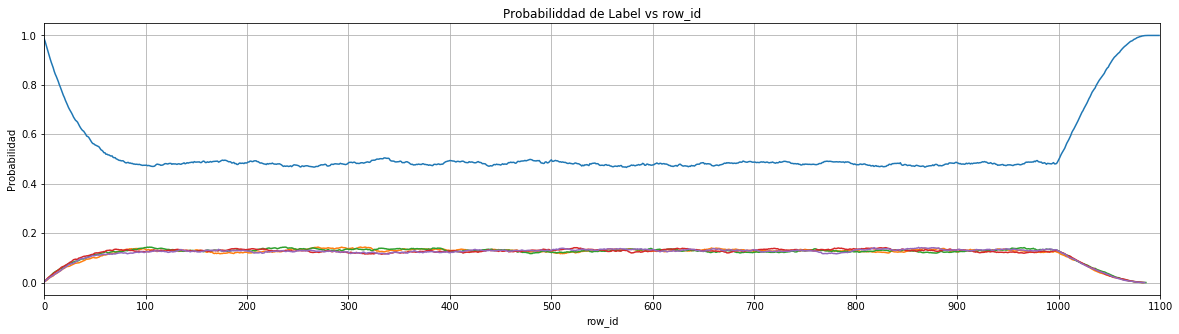

In [5]:
pivoted = pd.pivot_table(data = train.query("label == 0"),columns  = "well_id",aggfunc='count' ,index = 'row_id',values = "label")
(pivoted.count(axis=1)/4000).plot(figsize=(20,5))
pivoted = pd.pivot_table(data = train.query("label == 1"),columns  = "well_id",aggfunc='count' ,index = 'row_id',values = "label")
(pivoted.count(axis=1)/4000).plot(figsize=(20,5))
pivoted = pd.pivot_table(data = train.query("label == 2"),columns  = "well_id",aggfunc='count' ,index = 'row_id',values = "label")
(pivoted.count(axis=1)/4000).plot(figsize=(20,5))
pivoted = pd.pivot_table(data = train.query("label == 3"),columns  = "well_id",aggfunc='count' ,index = 'row_id',values = "label")
(pivoted.count(axis=1)/4000).plot(figsize=(20,5))
pivoted = pd.pivot_table(data = train.query("label == 4"),columns  = "well_id",aggfunc='count' ,index = 'row_id',values = "label")
(pivoted.count(axis=1)/4000).plot()
plt.xlabel("row_id")
plt.ylabel("Probabilidad")
plt.title("Probabiliddad de Label vs row_id")
plt.xticks(np.arange(0,1101,100))
plt.grid()

## Distribucion de clases por pozo. Vemos que la clase mayoritaria es un 50% en casi todos los pozos y la distribucion de las demas es casi la misma

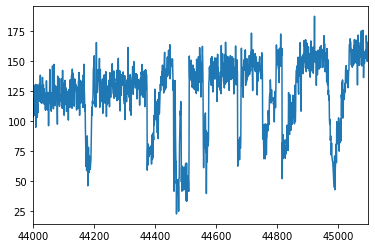

In [15]:
train.query("well_id==40")["GR"].plot()

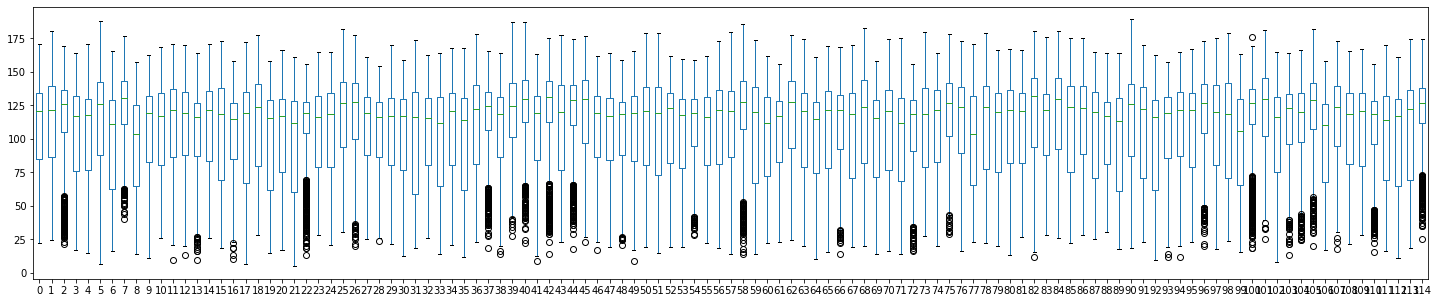

In [18]:
a = pd.pivot(data = train,columns  = "well_id",index = 'row_id',values = "GR")
a.iloc[:,:115].plot.box( figsize = (25,5))

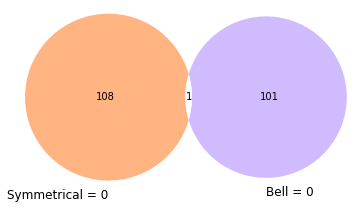

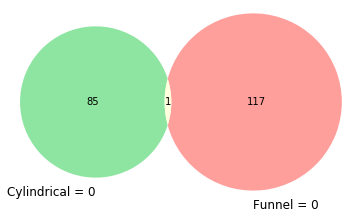

In [353]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
palette2 = sns.color_palette('pastel', 5)

# Make the diagram
venn2(subsets = (108, 101, 1), alpha = 1,set_labels=('Symmetrical = 0', 'Bell = 0') ,set_colors=(palette2[1], palette2[4]),normalize_to=10)
plt.show()
venn2(subsets = (85, 117, 1), alpha = 1,set_labels=('Cylindrical = 0', 'Funnel = 0') ,set_colors=(palette2[2], palette2[3]),normalize_to=10)
plt.show()

## Feature Engineering
## Se propuso Normalizar y Standarizar la unica feature GR
## Se calculo tambien 3 ventanas de medias utilizando GR normalizados y el GR Standarizado tomando ventanas de 5, 10 y 15. Tambien se calculo la ventana de variacion de 10 de rango. 

In [2]:
train['GR_znorm']=train.groupby('well_id')['GR'].transform(lambda x: (x - x.mean()) / x.std())
train['GR_mnorm']=train.groupby('well_id')['GR'].transform(lambda x: (x-x.min())/(x.max()-x.min()))

train['rolling_mean'] = train.groupby('well_id')['GR_mnorm'].rolling(20,win_type = "parzen",min_periods=1,center= True).mean().reset_index(0,drop=True)
train['rolling_mean2'] = train.groupby('well_id')['GR_mnorm'].rolling(40,win_type = "parzen ",min_periods=2,center= True).mean().reset_index(0,drop=True)
train['rolling_mean3'] = train.groupby('well_id')['GR_mnorm'].rolling(50,win_type = "parzen ",min_periods=3,center= True).mean().reset_index(0,drop=True)

train['rolling_std'] = train.groupby('well_id')['GR_mnorm'].rolling(40,min_periods=1,center= True).std().reset_index(0,drop=True)

train['n_rolling_mean'] = train.groupby('well_id')['GR_znorm'].rolling(5,win_type = "parzen",min_periods=1,center= True).mean().reset_index(0,drop=True)
train['n_rolling_mean2'] = train.groupby('well_id')['GR_znorm'].rolling(10,win_type = "parzen ",min_periods=2,center= True).mean().reset_index(0,drop=True)
train['n_rolling_mean3'] = train.groupby('well_id')['GR_znorm'].rolling(15,win_type = "parzen ",min_periods=3,center= True).mean().reset_index(0,drop=True)

train['n_rolling_std'] = train.groupby('well_id')['GR_znorm'].rolling(10,min_periods=1,center= True).std().reset_index(0,drop=True)



C:\Users\rodri\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Se grafico el pozo 22 junto con el suavizado de medias de ventana 5 y la ventana de variacion

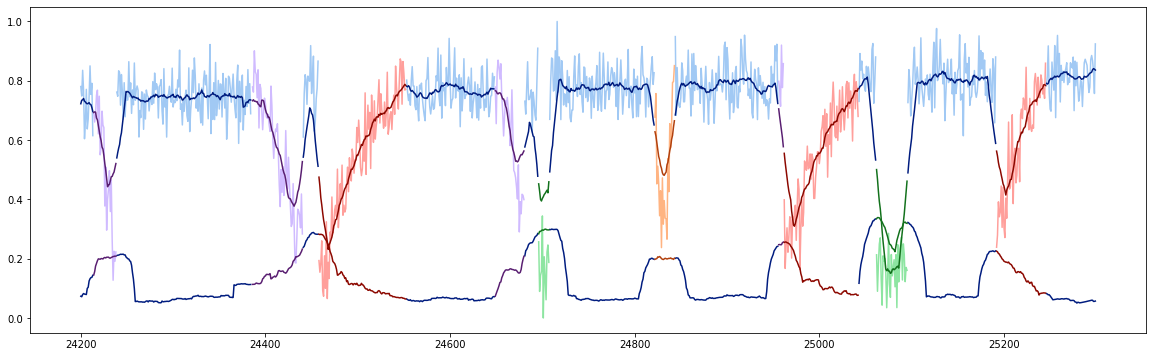

In [12]:
def plot_multicolored_line(df, i):
    df = train.query("well_id  in '{}'".format(i))
    labels= df["label"].unique()
    palette1 = sns.color_palette('dark', len(labels))
    palette2 = sns.color_palette('pastel', len(labels))
    plt.figure(figsize=(20, 6))
    for l in list(labels):
        copy = df.copy()
        copy.loc[copy['label']!= l,[ "GR_mnorm","rolling_std","rolling_mean" ]] = np.nan
        plt.plot(copy["GR_mnorm"], color=palette2[l])
        plt.plot(copy["rolling_std"], color=palette1[l]) 
        plt.plot(copy["rolling_mean"], color=palette1[l]) 
       # plt.plot(copy["rolling_mean2"], color="k") 

plot_multicolored_line(train ,22)


In [3]:
def transform(df,k,GR):
    for i in range(1,k):
        df["-"+GR+str(3*i)] =df.groupby('well_id')[GR].apply(lambda x: x.shift(3*i))
        df["+"+GR+str(3*i)] =df.groupby('well_id')[GR].apply(lambda x: x.shift(-3*i))
    df=df.fillna(0)
    return df

## Se agrego el valor de los siguientes 10 valores para atras y para adelante de cada punto para las ventanas de medias y ventana de variacion

In [4]:
train=transform(train,10,"rolling_mean2")
train=transform(train,10,"n_rolling_mean2")
train=transform(train,10,"rolling_std")
train=transform(train,10,"n_rolling_mean3")


In [5]:
train.replace([np.inf, -np.inf], np.nan, inplace = True)
train.fillna(0 , inplace = True)

## Division 40 pozos enteros para train y 10 pozos para test.

In [6]:
#test.drop(["unique_id","well_id"],axis=1,inplace=True)
#train.drop(["_id"],axis=1,inplace=True,errors ="ignore")
y=train["label"]
x=train.drop("label",axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,shuffle = False )

## Planteo de modelo geneerico de random forest. Falta optimizar hiperparametros mediante crossvalidation o similar

In [7]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=150, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=644,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=644,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Score evaluado sobre el mismo training 0.990341

In [8]:
predictions = model.predict(x_test)
model.score(x_train, y_train)

0.9945957792207792

In [9]:

test = x_test.copy()
test["predictions"] = predictions
test.loc[test["predictions"]== 1, "predictions"] = 2
test["label"] = y_test
test.loc[test["predictions"]>0,"predictionsuni"] = 2
test.loc[test["label"]>0,"labeluni"] = 1

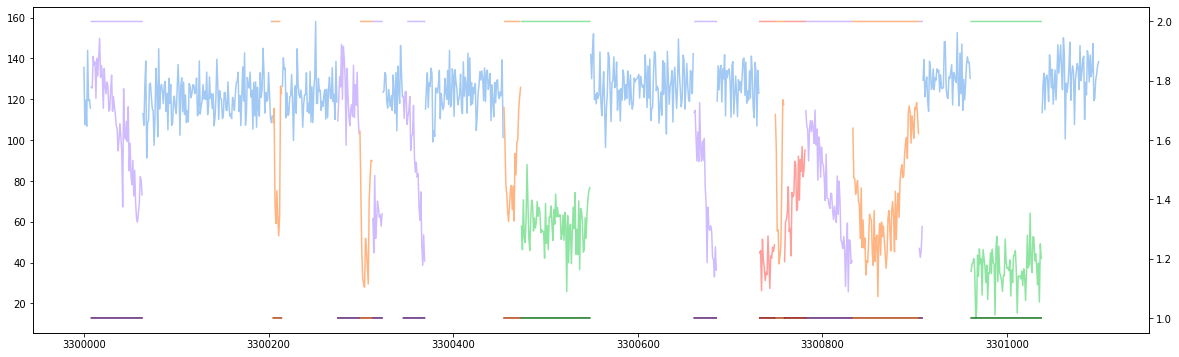

In [11]:
def plot_multicolored_line(df, i):
    df = df.query("well_id == '{}'".format(i))
    labels= df["label"].unique()
    palette1 = sns.color_palette('pastel', len(labels))
    palette2 = sns.color_palette('dark', len(labels))

    fig = plt.figure(figsize=(20, 6))
    axes1 = fig.add_subplot(111)
    axes2 = axes1.twinx()   # mirror them
    for l in list(labels):
        copydf = df.copy()
        copydf.loc[copydf['label']!= l, ["GR","labeluni","predictionsuni"]] = np.nan
        axes1.plot(copydf["GR"], color=palette1[l])
        axes2.plot(copydf["predictionsuni"], color=palette1[l])
        axes2.plot(copydf["labeluni"], color=palette2[l])
plot_multicolored_line(test ,3000)


In [12]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
model.score(x_test, y_test)

[[687034   2651      7   4230   3739]
 [  7747 129908   7181   6719   4425]
 [    13   9925 142824   2643   2728]
 [ 12810  10223   2611 126842   2305]
 [ 13242   7200   3240   2421 127332]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    697661
           1       0.81      0.83      0.82    155980
           2       0.92      0.90      0.91    158133
           3       0.89      0.82      0.85    154791
           4       0.91      0.83      0.87    153435

    accuracy                           0.92   1320000
   macro avg       0.90      0.87      0.88   1320000
weighted avg       0.92      0.92      0.92   1320000



0.9196515151515151

## Score evaluado sobre los 10 pozos de testing. 0.87

In [13]:
model.score(x_test, y_test)


0.9196515151515151

## Importancia de las variables junto con su variacion en el random forest:

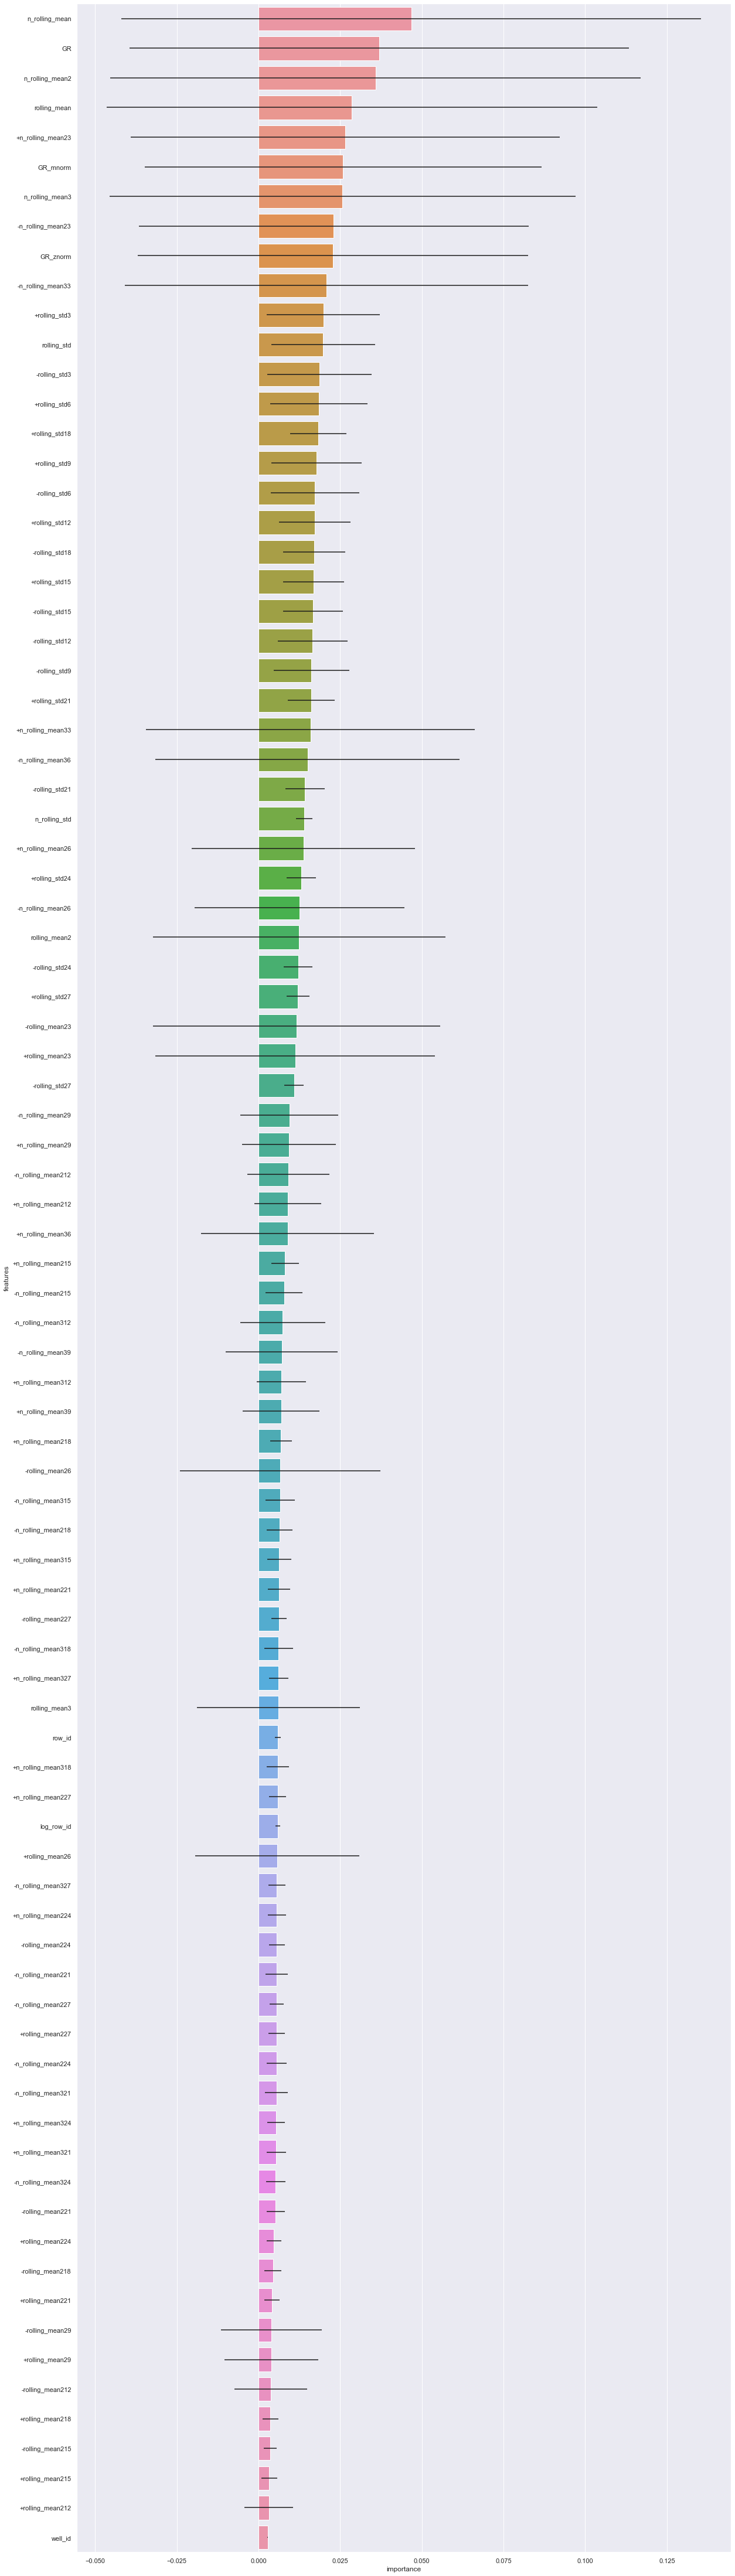

In [14]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,80)})
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
importance = model.feature_importances_
features = x_train.columns

feature_importance = pd.DataFrame()
feature_importance["importance"] = importance
feature_importance["std"] = std
feature_importance["features"] = features
feature_importance.sort_values("importance",ascending=False, inplace=True)
feature_importance.reset_index(drop = True , inplace = True)
sns.barplot(data =feature_importance , x ="importance", y ="features",xerr=feature_importance["std"])

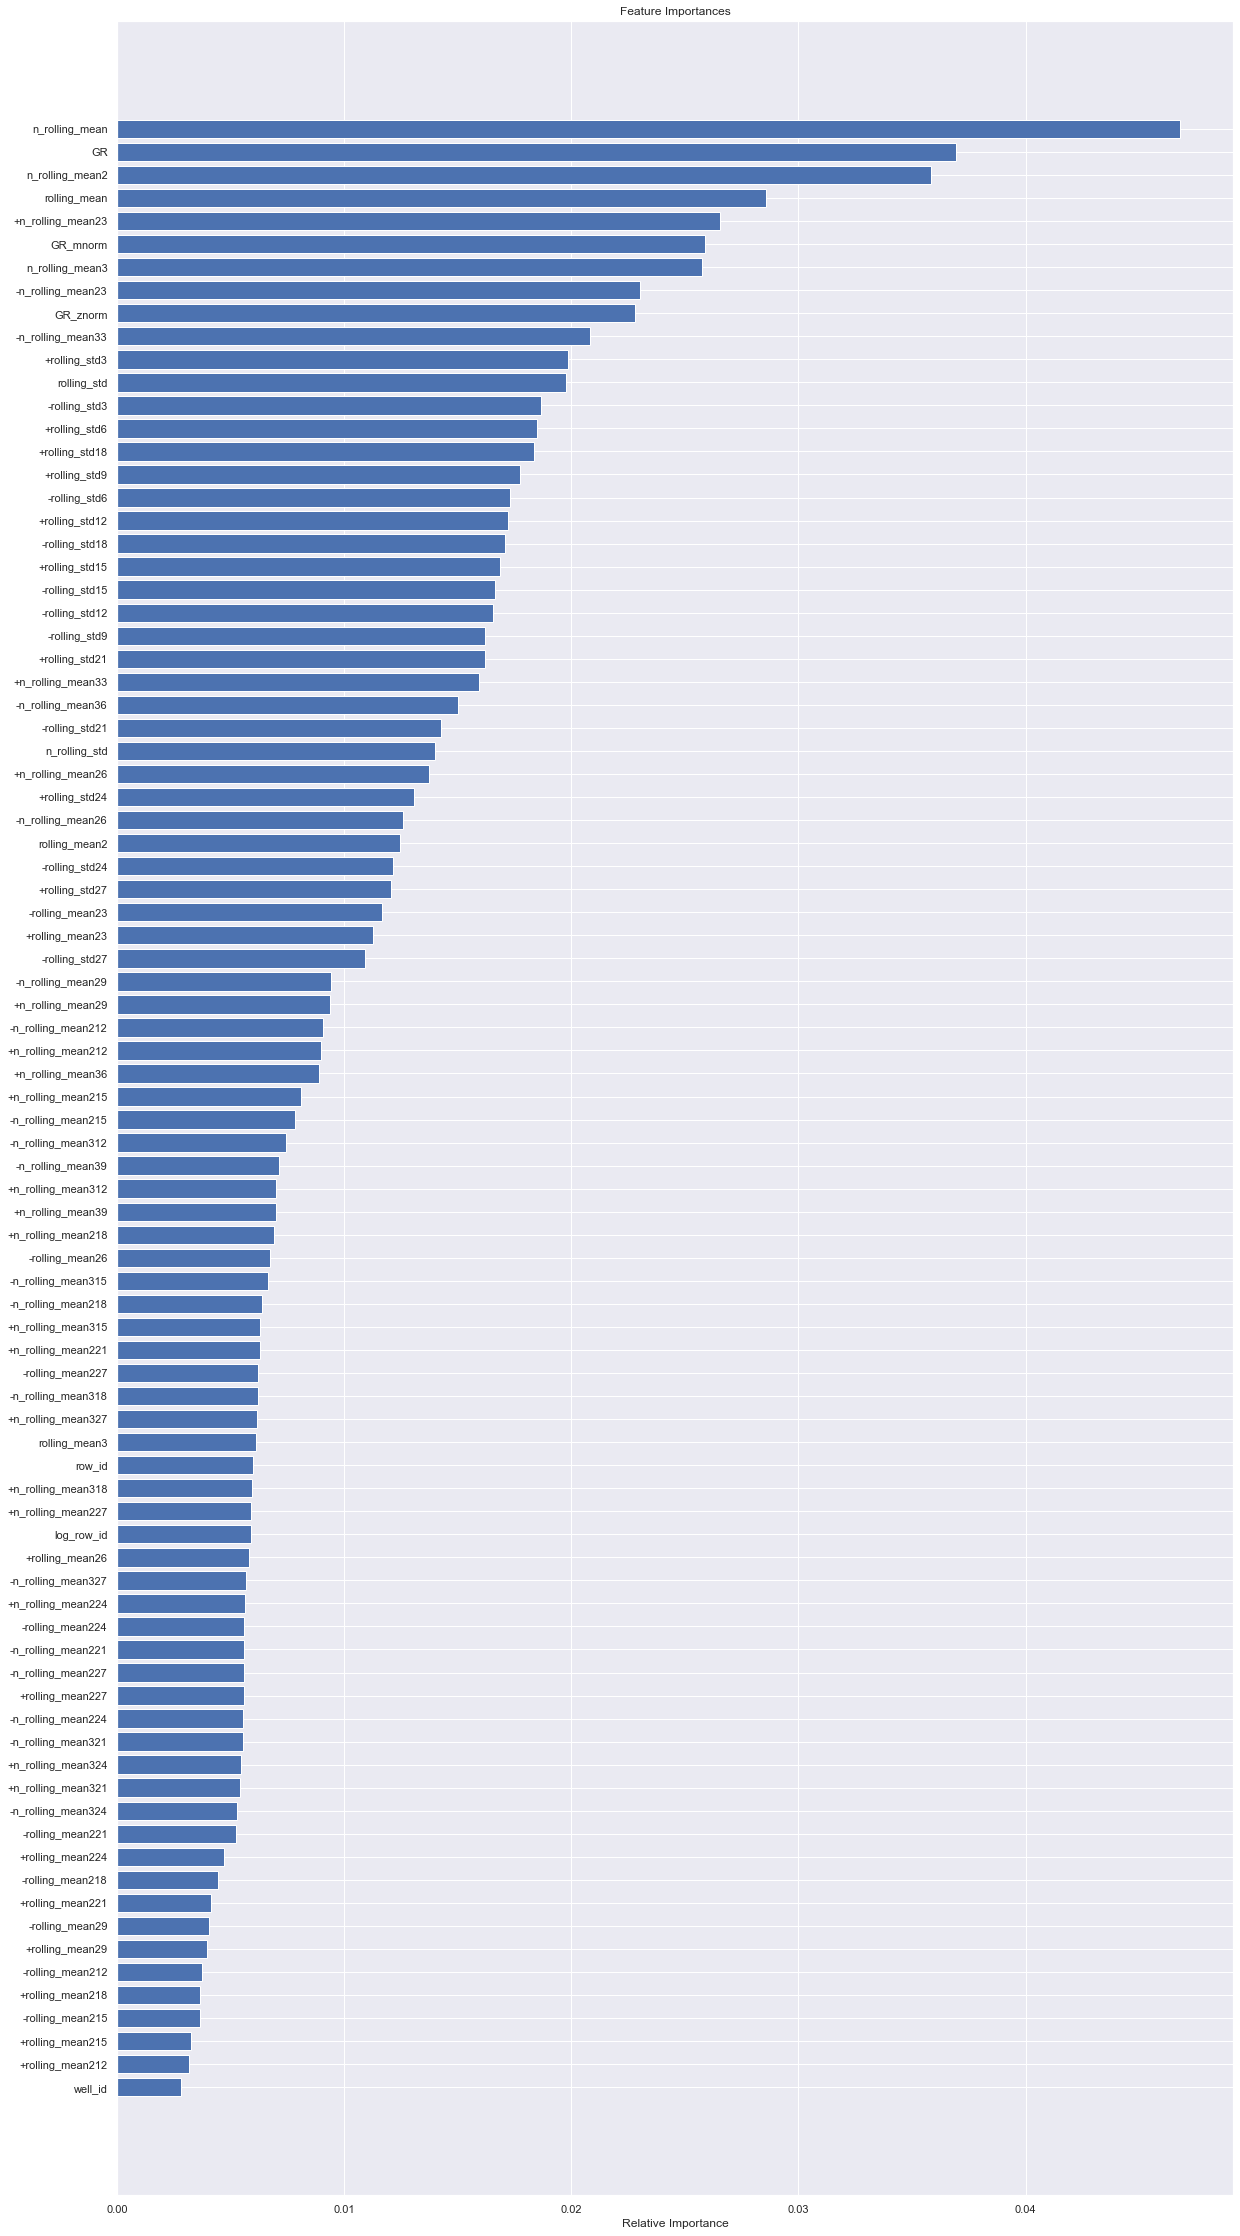

In [15]:
features = x_test.columns
importances = model.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(111)
plt.title('Feature Importances')
ax.barh(range(len(indices)), importances[indices], color='b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Planteo de Random foresto optimizacion no utilizado

Feature ranking:


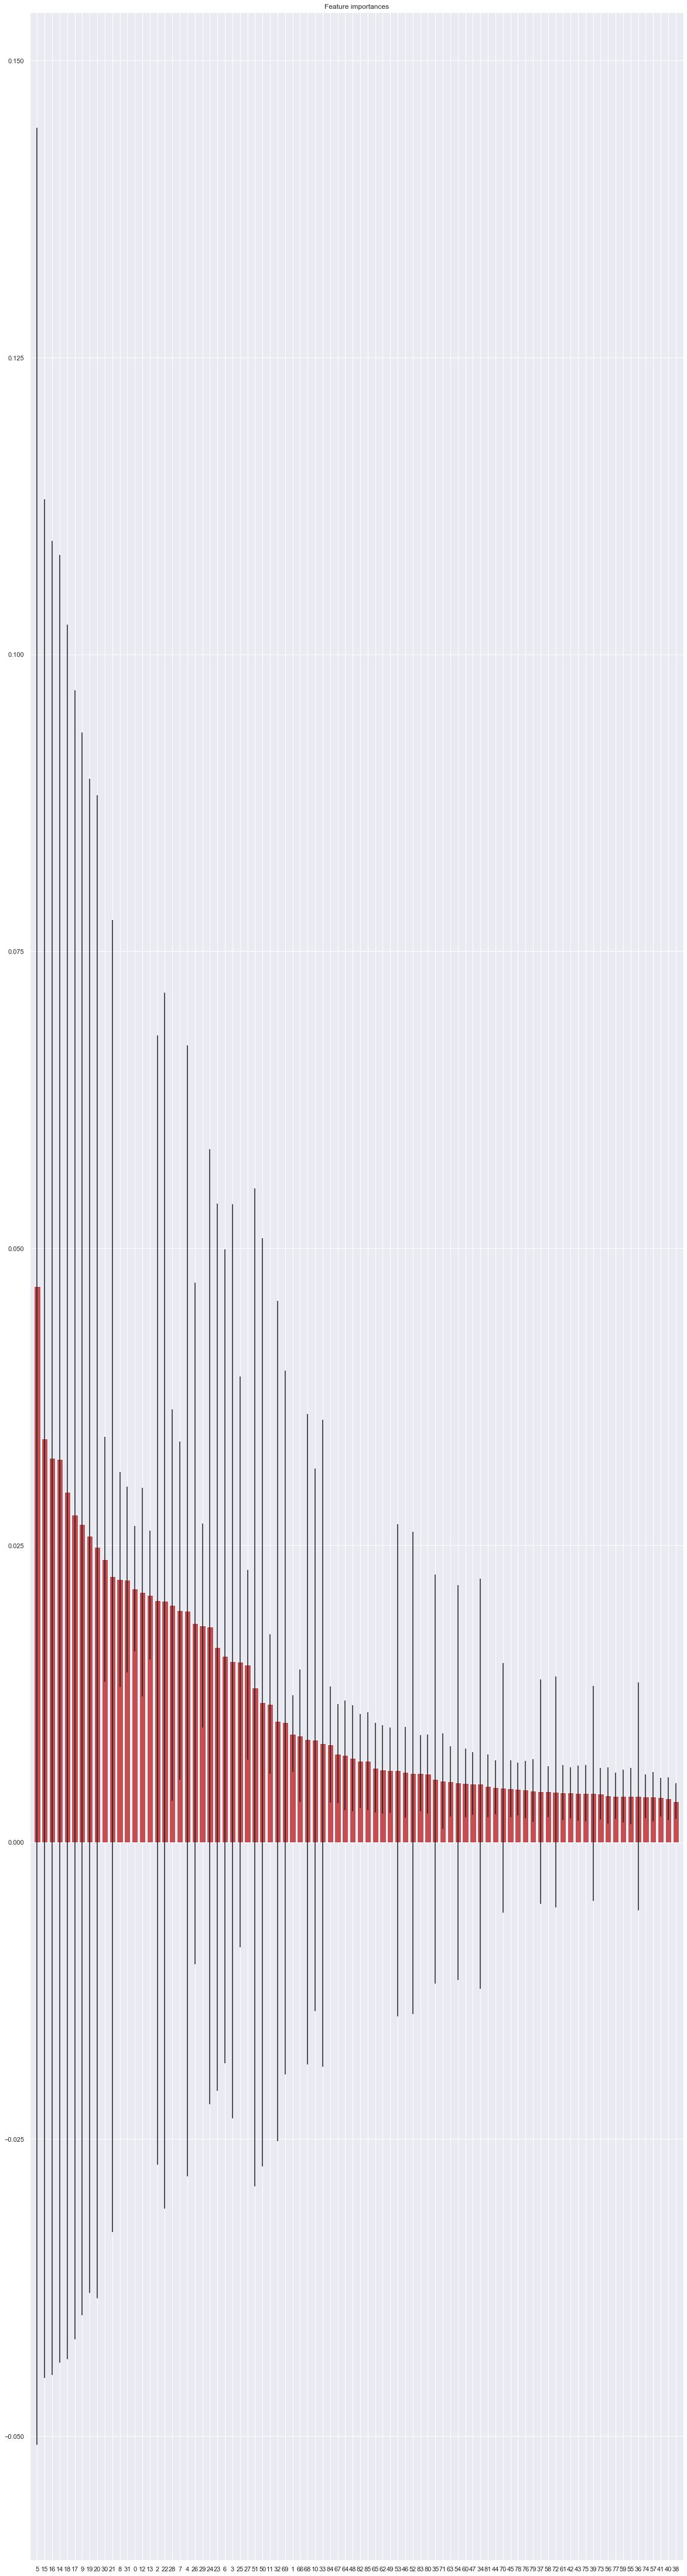

In [23]:
forest=model
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [16]:
'''rf = RandomForestClassifier()
gs = GridSearchCV(rf,{ 'max_depth': np.arange(20,51,5),
                    'n_estimators':np.arange(400,1500,150),
                    'max_features':np.arange(0.39,0.91,0.05)}
                      ,verbose=2,n_jobs=-1, 
                        error_score='raise')

gs.fit(x_train,y_train.values.ravel())
gs.best_score_, gs.best_params_'''
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4,6]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [17]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=644,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)